## Analizando datos

En el análisis de datos, la mayor parte del tiempo se gasta en la `limpieza de datos`, es decir,  filtrar y transformar los datos originales en una forma que sea más fácil de analizar. El proceso de filtrado y transformación también se denomina manipulación de datos.  Asumiendo directamente que los datos están listos para el análisis, aplicaremos algunos modelos sencillos y fijar un modelo con datos, cómo interactuar con modelos fijados y cómo aplicar un modelo fijado
para hacer predicciones.

### Fijando un modelo lineal

El modelo más simple en R es el modelo lineal, es decir, utilizamos una función lineal para describir la relación entre dos variables aleatorias bajo un cierto conjunto de suposiciones. En el siguiente ejemplo, crearemos una función lineal que asigna `x` a `3 + 2*x`. Entonces generamos un vector numérico aleatorio normalmente distribuido `x` y generamos `y` por `f(x)` más algún [ruido](https://en.wikipedia.org/wiki/Statistical_noise) independiente:

In [1]:
f <- function(x) 3 + 2 * x
x <- rnorm(1000)
y <- f(x) + 0.5 * rnorm(1000)

Si no sabemos cómo se genera `y` por `x`, podemos utilizar un modelo lineal para recuperar esa relación, es decir, recuperar el coeficiente de la función lineal.  El siguiente código usa `lm()` para ajustar `x` e `y` con un modelo lineal. Debes notar  que la fórmula `y ~ x` es una representación accesible para decir, que la regresión lineal está entre la variable dependiente `y`  con  un único regresor  `x`:

In [2]:
help(lm)

In [3]:
modelo1 <- lm(y ~ x)
modelo1


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
      2.993        2.015  


Los coeficientes verdaderos son `3`(intercepto) y `2` (pendiente) y con los datos de la muestra `x` e `y`, el modelo ajustado tiene coeficientes `2.973` (intercepto) y `2.004`(pendiente), que son bastante cercanos a los coeficientes verdaderos. 

Almacenamos el modelo en el `modelo1`. Para acceder a los coeficientes del modelo, podemos utilizar el siguiente código:

In [4]:
coef(modelo1)

(Intercept)           x 
   2.993087    2.015039

Alternativamente, podemos usar los coeficientes `modelo1$`, ya que `modelo1` es esencialmente una lista.

Podemos llamar a `summary()` para saber más sobre las propiedades estadísticas del modelo lineal:

In [5]:
summary(modelo1)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.49442 -0.30351 -0.00307  0.33884  1.54417 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.99309    0.01556   192.4   <2e-16 ***
x            2.01504    0.01569   128.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4916 on 998 degrees of freedom
Multiple R-squared:  0.9429,	Adjusted R-squared:  0.9429 
F-statistic: 1.649e+04 on 1 and 998 DF,  p-value: < 2.2e-16


La siguiente gráfica coloca los datos y el modelo ajustado juntos:

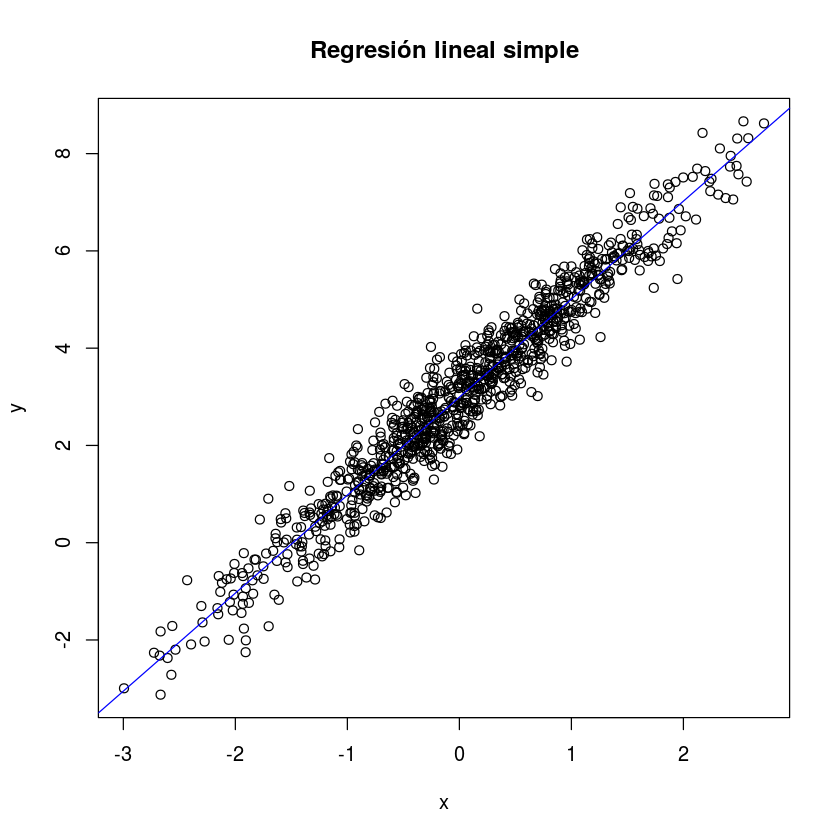

In [6]:
plot(x, y, main = "Regresión lineal simple")
abline(coef(modelo1), col = "blue")

En el código anterior, suministramos directamente un vector numérico de dos elementos de los coeficientes estimados  de la regresión a `abline()`, por lo que dibuja la línea de regresión como se supone. 

Entonces, podemos llamar a `predict()`, para usar el modelo ajustado y hacer predicciones. Para predecir `y` con errores estándar, cuando `x =-1` e `x= 0.5`, podemos ejecutar el siguiente código:

In [7]:
predict(modelo1, list(x = c(-1, 0.5)), se.fit = TRUE)

$fit
       1        2 
0.978048 4.000606 

$se.fit
         1          2 
0.02246951 0.01718226 

$df
[1] 998

$residual.scale
[1] 0.4916356

El resultado de la predicción es una lista de valores de `y` (`$ fit`), los errores estándar de los valores ajustados (`$ se.fit`), los grados de libertad (`$df`) y `$ residual.scale`.

Si tenemos el archivo  `Notas.txt`,  donde cada línea contiene los datos de un estudiante, que consisten en el promedio de prácticas,el examen final y el promedio de las tareas. Podría ser interesante ver qué tan bien las calificaciones de  las prácticas  y el promedio de las tareas,  predicen la calificación del estudiante en el examen final.

Primero leemos  el archivo de datos:


In [8]:
examenNotas <- read.table("Notas.txt")

Este archivo no incluye una línea de encabezado que nombre las variables en cada registro de estudiante, por lo que especificamos header = FALSE en la llamada a la función. Este es un ejemplo de  argumento predeterminado. En realidad, el valor por defecto del argumento `header` es `FALSE`  (lo que se puede comprobar consultando la ayuda en línea de R para `read.table()`), por lo que no necesitamos especificar esta configuración, pero es más claro si lo hacemos.

Nuestros datos están ahora en `examenNotas`, que es un objeto `R` de clase `data.frame`.

In [9]:
class(examenNotas)

[1] "data.frame"

Sólo para comprobar que el archivo se ha leído correctamente, echemos un vistazo a las primeras filas:

In [10]:
head(examenNotas)

V1,V2,V3
2.0,4.0,4
1.7,2.7,4
1.3,3.3,4
3.3,3.3,4
0.0,3.3,4
3.0,3.7,4


Al no tener un encabezado para los datos, `R` nombró las columnas `V1`, `V2` y `V3`. Los números de fila aparecen a la izquierda. Siempre es mejor tener un encabezado en nuestro archivo de datos, con nombres significativos como `Exam1` por ejemplo.

Vamos a tratar de predecir la puntuación del `examen2` (dada en la segunda columna de `examenNotas`) desde el `examen1` (primera columna):

```

lma <- lm(examenNotas[,2] ~ examenNotas[,1])
```


In [11]:
help(lm)

La función `lm()` (para  modelo lineal) indica a `R` que se ajuste a esta ecuación de predicción:  `examen2 = b0 + b1 examen1`
 

Aquí, `b_0` y `b1` son constantes a estimar a partir de nuestros datos. En otras palabras, estamos ajustando una línea recta a los pares `(examen1, examen2)` en nuestros datos. Esto se hace a través de un método clásico de mínimos cuadrados. 

Ten en cuenta que las puntuaciones del `examen1`, que se almacenan en la primera columna de nuestro data frame, se denominan colectivamente `examenNotas[, 1]`. La omisión del primer subíndice (el número de fila) significa que nos estamos refiriendo a una columna entera del data frame. Las puntuaciones del `examen2` se referencia de manera similar. Así, nuestra llamada a `lm()` predice la segunda columna de `examenNotas` desde la primera.

In [12]:
lma <- lm(examenNotas$V2 ~ examenNotas$V1)

Recordando que un data frame es sólo una lista cuyos elementos son vectores. Aquí, las columnas son los componentes `V1`, `V2` y `V3` de la lista.

Los resultados devueltos por `lm()` están ahora en un objeto que hemos almacenado en la variable `lma`. Es una instancia  de la clase `lm`. Podemos enumerar sus componentes con la función `attributes()`:

In [13]:
attributes(lma)

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

Como de costumbre, se puede obtener una descripción más detallada a través de la llamada a `str(lma)`. Los valores estimados de `b0` y `b1`, se almacenan en `lma$coefficients`. 


In [14]:
str(lma)

List of 12
 $ coefficients : Named num [1:2] 3.088 0.158
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "examenNotas$V1"
 $ residuals    : Named num [1:33] 0.59529 -0.65723 0.00607 -0.31046 0.21182 ...
  ..- attr(*, "names")= chr [1:33] "1" "2" "3" "4" ...
 $ effects      : Named num [1:33] -20.1234 1.2975 0.0193 -0.4624 0.3324 ...
  ..- attr(*, "names")= chr [1:33] "(Intercept)" "examenNotas$V1" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:33] 3.4 3.36 3.29 3.61 3.09 ...
  ..- attr(*, "names")= chr [1:33] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:33, 1:2] -5.745 0.174 0.174 0.174 0.174 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:33] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "examenNotas$V1"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.17 1.1
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.res

También puede guardar un poco de escritura abreviando los nombres de los componentes, siempre y cuando no acorte el nombre de un componente hasta el punto de ser ambiguo. Por ejemplo, si una lista consiste de los componentes `xyz`, `xywa` y `xbcde`, entonces el segundo y tercer componentes se pueden abreviarse a `xyw` y `xb` respectivamente. Así que aquí podríamos escribir lo siguiente:

In [15]:
lma$coef

(Intercept) examenNotas$V1 
     3.0881813      0.1582661

Dado que `lma$coeffients` es un vector, el resultado es simple. Pero veamos que sucede cuando se muestra el objeto `lma` propiamente dicho:

In [16]:
lma


Call:
lm(formula = examenNotas$V2 ~ examenNotas$V1)

Coefficients:
   (Intercept)  examenNotas$V1  
        3.0882          0.1583  


¿Por qué `R` imprimió sólo estos elementos y no los otros componentes de lma?- La respuesta es que aquí `R` está utilizando la función `print()`, que es otro ejemplo de **funciones genéricas**. Como una función genérica, `print()` realmente deja el trabajo a otra función cuyo trabajo es imprimir objetos de clase `lm`, la función `print.lm()` y esto es lo que muestra esa función.


Podemos obtener una descripción más detallada del contenido de `lma` llamando a `summary()`, una  función genérica que realiza una llamada  a `summary.lm()`  detrás de escenas, para obtener  un resumen específico de `lma`:

In [17]:
summary(lma)


Call:
lm(formula = examenNotas$V2 ~ examenNotas$V1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.08818 -0.26298  0.05355  0.27875  0.91182 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.08818    0.19773  15.618 3.06e-16 ***
examenNotas$V1  0.15827    0.06625   2.389   0.0232 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5432 on 31 degrees of freedom
Multiple R-squared:  0.1555,	Adjusted R-squared:  0.1282 
F-statistic: 5.706 on 1 and 31 DF,  p-value: 0.02317


Para estimar una ecuación que predice, el `examen2` del `examen1` y el `examen3`, usaríamos la notación `+`:

In [18]:
lmb <- lm(examenNotas[,2] ~ examenNotas[,1] + examenNotas[,3])

Tenga en cuenta que el símbolo `+` no significa que calculamos la suma de las dos cantidades. Es simplemente un delimitador en nuestra lista de variables predictoras.

En los siguientes ejemplos, tratemos de predecir el tiempo en el aire de un vuelo utilizando modelos lineales de diferente complejidad. La variable más obvia que debe ser útil para predecir el tiempo en el aaire aire es la distancia.

Primero, cargamos el conjunto de datos y hacemos un diagrama de dispersión de la distancia y el tiempo en el aire. Utilizamos `pch = "."`,  para hacer cada punto muy pequeño, ya que el número de registros en el conjunto de datos es grande:

In [19]:
#install.packages("nycflights13", repos = "http://cran.us.r-project.org")

data("flights", package = "nycflights13")

Antes de verter todo el conjunto de datos en un modelo lineal, dividimos el conjunto de datos en dos partes: un conjunto de entrenamiento y un conjunto de pruebas. El propósito de dividir el conjunto de datos es que queremos realizar no sólo una  evaluación muestral, sino también la evaluación del modelo  fuera de la muestra. Más específicamente, colocamos el `75%` de los datos en el conjunto de entrenamiento y el restante `25%` de los datos en el conjunto de pruebas. En el código siguiente, usamos `sample()` para tener  una muestra aleatoria de `75%` de los registros de los datos originales y usamos `setdiff()` para obtener el resto de los registros:

In [20]:
filas <- nrow(flights)
id_filas <- 1:filas
id_muestras <- sample(id_filas, filas * 0.75, replace = FALSE)
entrenamiento_vuelos <- flights[id_muestras,]
pruebas_vuelos <- flights[setdiff(id_filas, id_muestras), ]

In [21]:
help(setdiff)

se debe tener en cuenta que `setdiff(id_filas, id_muestras)` devuelve los índices en `id_filas` pero no en `id_muestras`.

Ahora `entrenamiento_vuelos` es el conjunto de entrenamiento y `pruebas_vuelos` es el conjunto de pruebas. Con los conjuntos de datos divididos, el procedimiento de ajuste del modelo y la evaluación del modelo es sencillo.

Primero, usamos el conjunto de entrenamiento para ajustarlo al modelo, luego hacemos una predicción en la muestra para ver la magnitud de los errores en la muestra:

In [22]:
modelo2 <- lm(air_time ~ distance, data = entrenamiento_vuelos)
entrenamiento_prediccion2 <- predict(modelo2, entrenamiento_vuelos)
entrenamiento_error2 <- entrenamiento_vuelos$air_time - entrenamiento_prediccion2

Para evaluar la magnitud de los errores, definimos una función denominada `error_evaluacion()` para calcular la media de los  errores absolutos y la desviación estándar de los errores:

In [23]:
error_evaluacion <- function(x) {
    c(abs_err = mean(abs(x), na.rm = TRUE),
      std_dev = sd(x, na.rm = TRUE))
}

Usando esta función, podemos evaluar los errores de las predicciones muestrales del `modelo2`:

In [24]:
error_evaluacion(entrenamiento_error2)

abs_err   std_dev 
 9.425066 12.776291

Los errores medios absolutos indican que en promedio la predicción se desvía del valor correcto en aproximadamente `9.42`  minutos, en valor absoluto y tienen una desviación estándar de `12.8` minutos.

A continuación, realizamos una evaluación simple fuera de la muestra utilizando el modelo para predecir con el conjunto de pruebas:

In [25]:
prueba_prediccion2<- predict (modelo2, pruebas_vuelos)
prueba_error2 <- pruebas_vuelos$air_time - prueba_prediccion2
error_evaluacion(prueba_error2)

abs_err   std_dev 
 9.444172 12.798884

La predicción resulta en un vector numérico de valores predichos. Tanto los errores  absolutos, como la desviación estándar de los errores aumentan ligeramente, lo que sugiere que la calidad de la predicción fuera de la muestra no empeora significativamente, lo que indica que el `modelo2` no parece ser el resultado de un  sobreajuste.

Dado que `modelo2` tiene sólo un regresor,`distance`, es natural considerar si más Los regresores mejorarían la predicción. El siguiente código se ajusta a un nuevo modelo lineal con no sólo `distancia` pero también con `carrier`, `month` y hora de salida (`dep_time`) como regresores:

In [26]:
modelo3 <- lm(air_time ~ carrier + distance + month + dep_time, data = entrenamiento_vuelos)
entrenamiento_prediccion3 <- predict(modelo3, entrenamiento_vuelos)
entrenamiento_error3 <- entrenamiento_vuelos$air_time - entrenamiento_prediccion3
error_evaluacion(entrenamiento_error3)

abs_err   std_dev 
 9.322365 12.635550

Los errores en la muestra son ligeramente más bajos tanto en magnitud como en variación:

In [27]:
prueba_prediccion3<- predict(modelo3, pruebas_vuelos)
prueba_error3 <- pruebas_vuelos$air_time - prueba_prediccion3
error_evaluacion(prueba_error3)

abs_err   std_dev 
 9.353885 12.675604

También , los errores fuera de la muestra se ven ligeramente mejor que el `modelo2`. Para comparar la distribución de errores fuera de la muestra antes y después de añadir nuevos regresores al modelo lineal, superponemos las dos curvas de densidad:

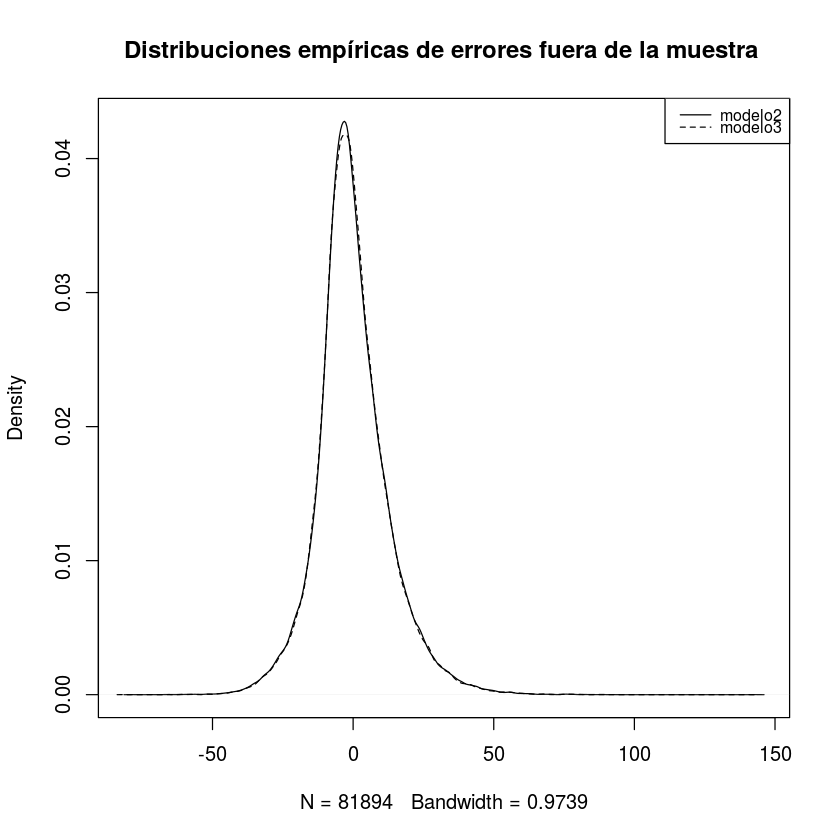

In [28]:
plot(density(prueba_error2, na.rm = TRUE), main = "Distribuciones empíricas de errores fuera de la muestra ")
lines(density(prueba_error3, na.rm = TRUE), lty = 2)
legend("topright", legend = c("modelo2", "modelo3"),lty = c(1, 2), cex = 0.8,
       x.intersp = 0.6, y.intersp = 0.6)

### Lecturas

* [CRAN Task View: Machine Learning & Statistical Learning](https://cran.r-project.org/web/views/MachineLearning.html).